### NAME -Rugved Somwanshi
### ROLL NO - 33273

### TITANIC DATASET

In [4]:
import pandas as pd
import numpy as py
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### DATA PREPROCESSING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
group = df.groupby(['Sex', 'Survived'])
group.mean()["Age"]

Sex     Survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: Age, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

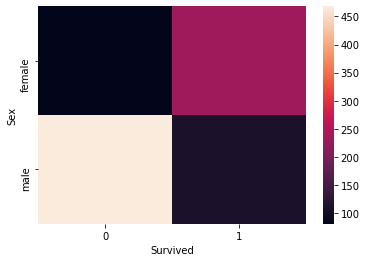

In [10]:
sns.heatmap(group.size().unstack())

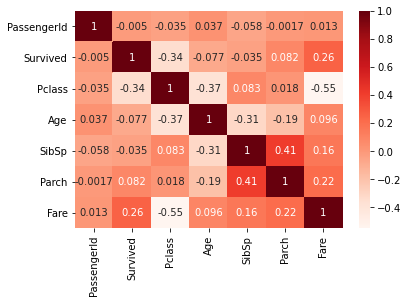

In [11]:
sns.heatmap(df.corr(),cmap="Reds",annot=True)
plt.show()

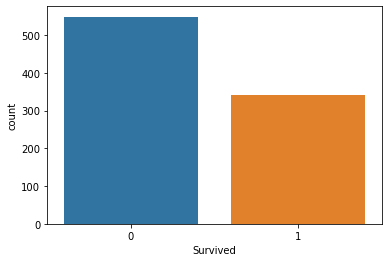

In [12]:
sns.countplot(x='Survived',data=df)
plt.show()

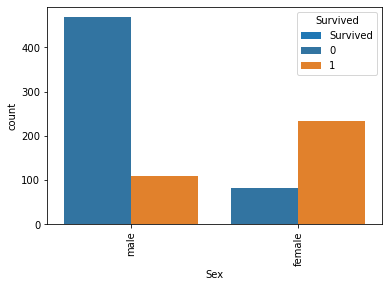

In [13]:
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot(x='Sex',hue='Survived',data=df)
plt.show()

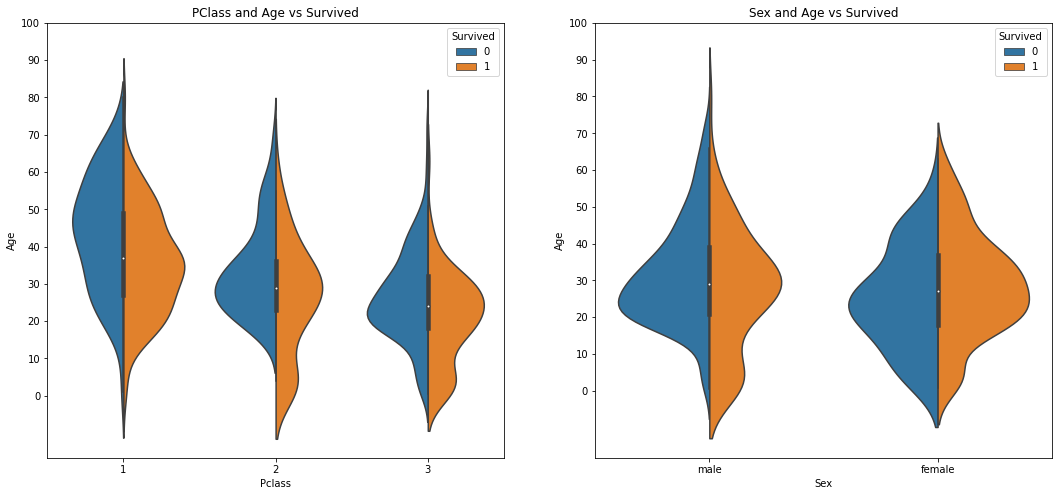

In [14]:
fig,axes=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=df,split=True,ax=axes[0])
axes[0].set_title('PClass and Age vs Survived')
axes[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=df,split=True,ax=axes[1])
axes[1].set_title('Sex and Age vs Survived')
axes[1].set_yticks(range(0,110,10))
plt.show()

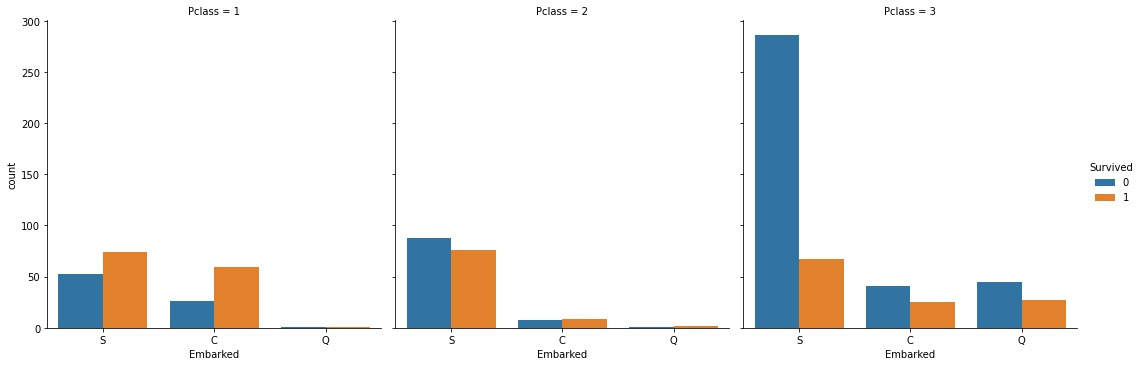

In [15]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df)

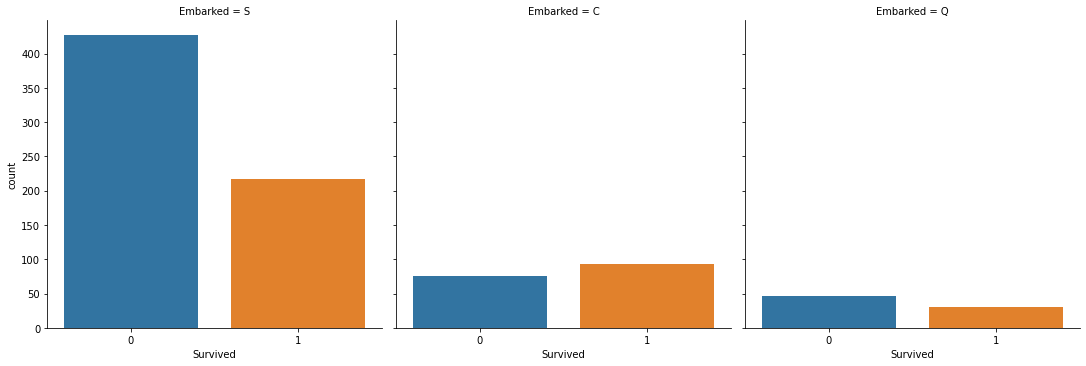

In [16]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=df);

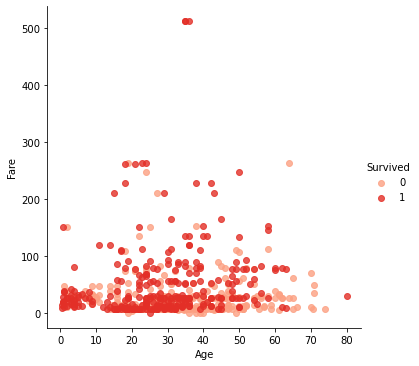

In [17]:
sns.lmplot(x='Age', y='Fare', hue='Survived',  data=df.loc[df['Survived'].isin([1,0])], fit_reg=False ,palette = "Reds")
plt.show()

### DATA PREPROCESSING

In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

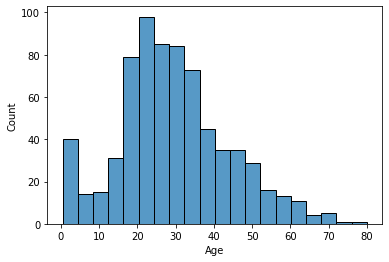

In [19]:
df["Age"].dtypes
sns.histplot(df["Age"])

In [20]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [21]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

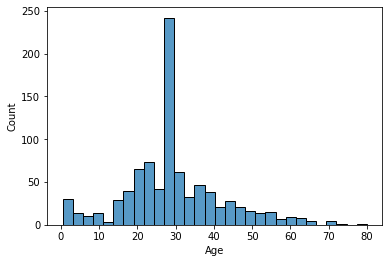

In [22]:
sns.histplot(df["Age"])

#### By inserting median of Age at null values , central value increases

In [23]:
df["Cabin"].fillna(df["Cabin"].mode()[0] , inplace=True)

In [24]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [25]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

In [26]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### FEATURE SELECTION

In [27]:
df.drop(['PassengerId','Cabin','Embarked','Fare','Name','Ticket'], axis = 1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,28.0,1,2
889,1,1,male,26.0,0,0


### LABEL ENCODING

In [29]:
df.loc[df["Sex"]=="male","Sex"] = 0
df.loc[df["Sex"]=="female","Sex"] = 0
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,0,35.0,0,0
...,...,...,...,...,...,...
886,0,2,0,27.0,0,0
887,1,1,0,19.0,0,0
888,0,3,0,28.0,1,2
889,1,1,0,26.0,0,0


### IMPORTING MODEL

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### DROPING DEPENDENT VARIABLE

In [31]:
X = df.drop("Survived",axis=1)
Y = df["Survived"]


### TRAIN TEST SPLIT DATA

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=120)

### MODEL FITTING

In [33]:
regressor = LogisticRegression()
result = regressor.fit(x_train,y_train)

### PREDICTION

In [34]:
y_pred = result.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0], dtype=int64)

### MODEL EVALUATION

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import precision_score,recall_score,r2_score

accuracy_score(y_test, y_pred)*100

72.6457399103139

In [41]:
confusion_matrix(y_test,y_pred)

array([[128,  25],
       [ 36,  34]], dtype=int64)

In [42]:
mean_absolute_error(y_test,y_pred)*100


27.3542600896861

In [43]:
mean_squared_error(y_test,y_pred)*100

27.3542600896861

In [44]:
precision_score(y_test,y_pred)*100

57.6271186440678

In [45]:
recall_score(y_test,y_pred)*100

48.57142857142857

In [46]:
r2_score(y_test,y_pred)*100

-27.012138188608816

### MODEL ACCURACY USING LOGISTIC REGRESSION - 72 %